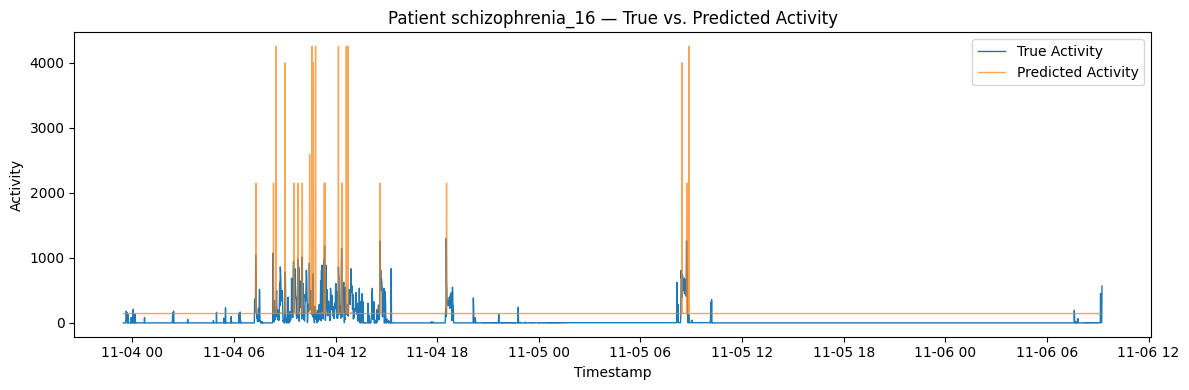

In [ ]:
import random
import matplotlib.pyplot as plt
from joblib import load, dump
from sklearn.naive_bayes import GaussianNB


X_train, y_train, t_train = load('train_set.joblib')
X_val,   y_val,   t_val   = load('val_set.joblib')
X_test,  y_test,  t_test  = load('test_set.joblib')


nb = GaussianNB()
nb.fit(X_train.drop(columns=['patient_id']), y_train)
dump(nb, 'nb_model.joblib')


pid = random.choice(X_test['patient_id'].unique())
mask = X_test['patient_id'] == pid

X_pid = X_test[mask].drop(columns=['patient_id'])
y_true = y_test[mask]
times  = t_test[mask]


y_pred = nb.predict(X_pid)

plt.figure(figsize=(12, 4))
plt.plot(times,   y_true, label='True Activity',   linewidth=1)
plt.plot(times,   y_pred, label='Predicted Activity', linewidth=1, alpha=0.7)
plt.title(f'Patient {pid} — True vs. Predicted Activity')
plt.xlabel('Timestamp')
plt.ylabel('Activity')
plt.legend()
plt.tight_layout()
plt.show()


In [7]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

model = load('nb_model.joblib')


patient_ids = X_test['patient_id']
X_feat = X_test.drop(columns=['patient_id'])


y_pred = model.predict(X_feat)


df_eval = pd.DataFrame({
    'patient_id': patient_ids,
    'y_true':     y_test,
    'y_pred':     y_pred
})

# ── Compute per-patient RMSE and MAE ──
metrics = []
for pid, group in df_eval.groupby('patient_id'):
    rmse = np.sqrt(mean_squared_error(group['y_true'], group['y_pred']))
    mae  = mean_absolute_error(group['y_true'], group['y_pred'])
    metrics.append({'patient_id': pid, 'rmse': rmse, 'mae': mae})

df_metrics = pd.DataFrame(metrics)

# ── Compute mean across all patients ──
mean_rmse = df_metrics['rmse'].mean()
mean_mae  = df_metrics['mae'].mean()

print(f"Mean RMSE across patients: {mean_rmse:.4f}")
print(f"Mean MAE  across patients: {mean_mae:.4f}")

Mean RMSE across patients: 1336.2843
Mean MAE  across patients: 1300.0976
